In [1]:
#%%
from vnpy.app.spread_trading.backtesting import BacktestingEngine
from vnpy.app.spread_trading.strategies.statistical_arbitrage_strategy import (
    StatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.base import LegData, SpreadData
from datetime import datetime

In [2]:
spread = SpreadData(
    name="IF-Spread",
    legs=[LegData("IF1911.CFFEX"), LegData("IF1912.CFFEX")],
    price_multipliers={"IF1911.CFFEX": 1, "IF1912.CFFEX": -1},
    trading_multipliers={"IF1911.CFFEX": 1, "IF1912.CFFEX": -1},
    active_symbol="IF1911.CFFEX",
    inverse_contracts={"IF1911.CFFEX": False, "IF1912.CFFEX": False},
    min_volume=1
)

In [3]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    spread=spread,
    interval="1m",
    start=datetime(2019, 6, 10),
    end=datetime(2019, 11, 10),
    rate=0,
    slippage=0,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(StatisticalArbitrageStrategy, {})

2019-11-10 16:09:03.822440	开始加载历史数据
2019-11-10 16:09:07.915724	历史数据加载完成，数据量：7200
2019-11-10 16:09:07.993766	策略初始化完成
2019-11-10 16:09:07.993766	开始回放历史数据
2019-11-10 16:09:08.186919	历史数据回放结束
2019-11-10 16:09:08.186919	开始计算逐日盯市盈亏
2019-11-10 16:09:08.192772	逐日盯市盈亏计算完成
2019-11-10 16:09:08.193748	开始计算策略统计指标
2019-11-10 16:09:08.236670	------------------------------
2019-11-10 16:09:08.236670	首个交易日：	2019-10-14
2019-11-10 16:09:08.236670	最后交易日：	2019-11-08
2019-11-10 16:09:08.236670	总交易日：	20
2019-11-10 16:09:08.236670	盈利交易日：	12
2019-11-10 16:09:08.236670	亏损交易日：	8
2019-11-10 16:09:08.236670	起始资金：	1,000,000.00
2019-11-10 16:09:08.236670	结束资金：	1,075,600.00
2019-11-10 16:09:08.236670	总收益率：	7.56%
2019-11-10 16:09:08.236670	年化收益：	90.72%
2019-11-10 16:09:08.236670	最大回撤: 	-24,600.00
2019-11-10 16:09:08.236670	百分比最大回撤: -2.29%
2019-11-10 16:09:08.236670	最长回撤天数: 	9
2019-11-10 16:09:08.236670	总盈亏：	75,600.00
2019-11-10 16:09:08.236670	总手续费：	0.00
2019-11-10 16:09:08.236670	总滑点：	0.00
2019-11-10 16:09:08.236670	

C:\Github\vnpy\vnpy\app\spread_trading\backtesting.py:289: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


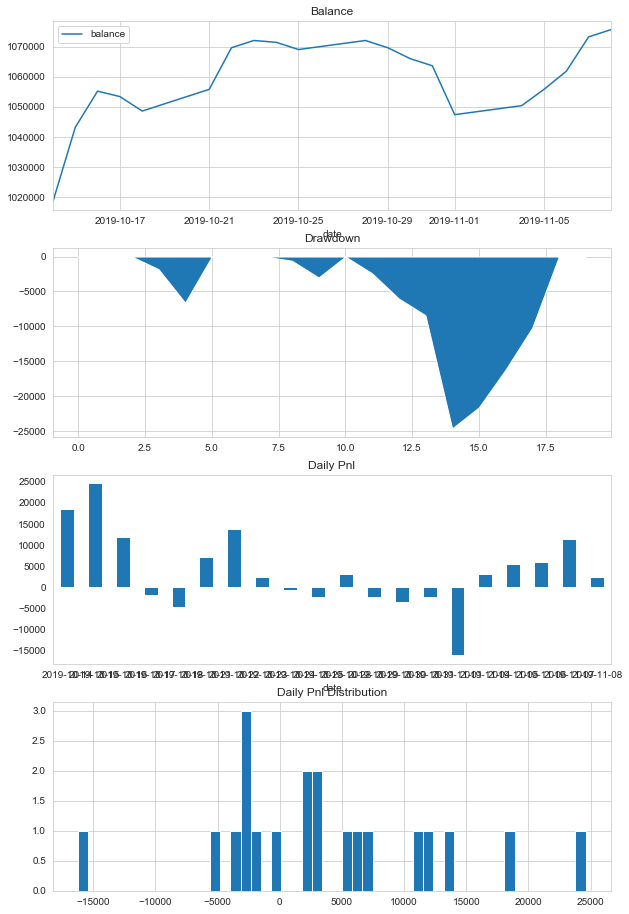

In [4]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [ ]:
for trade in engine.trades.values():
    print(trade)